## Text Mining
- 비정형 텍스트 데이터에서 의미를 추출하는 작업
- 자연어처리 기술을 접목해서 최근에는 많이 활용되고 있다
  - (자연어처리 : 사람의 언어를 컴퓨터가 이해할 수 있도록 연구하는 학문)

## Text Mining process
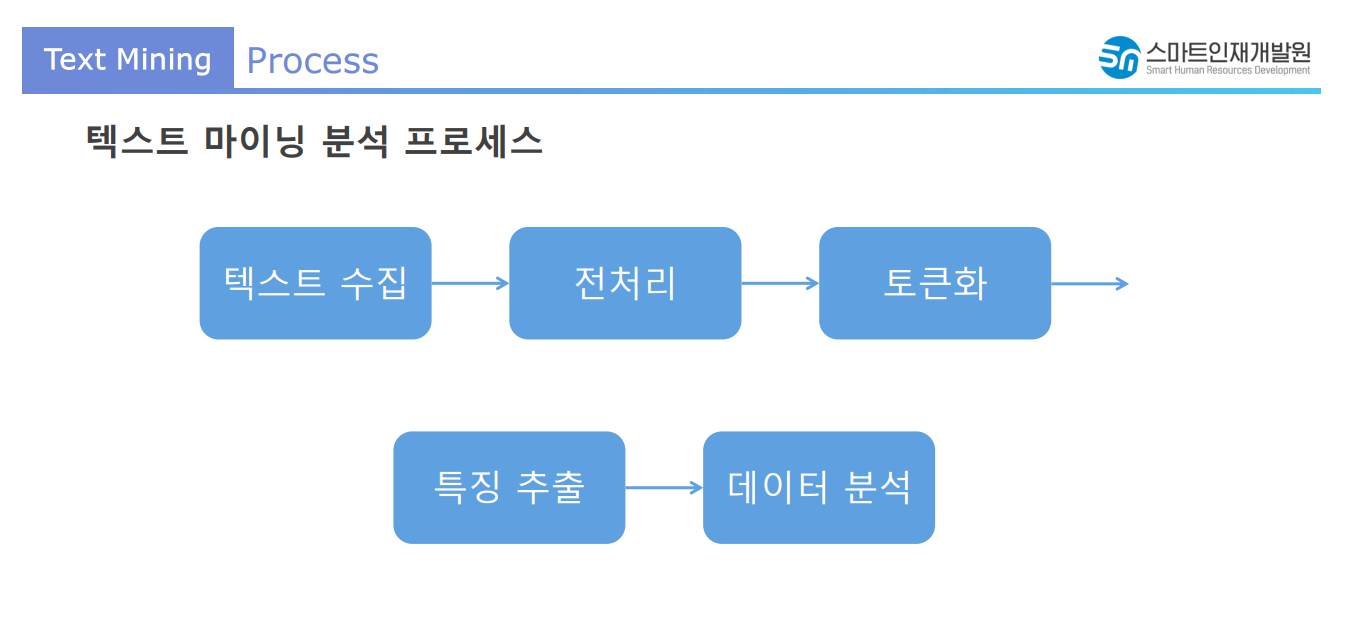

1.전처리
- 오타, 띄어쓰기 교정
- 불필요한 단어토큰 제거(문장부호,이모지,불용어)
- 형태소 분석(품사를 기준으로 명사,형용사,동사 등.. 분리, 어근추출)

## 텍스트마이닝에서 활용할 분석종류
1. 단어빈도 분석
2. 감성분석 : 텍스트에서 사람의 감정/기분/의견/태도 등을 분석하는 작업
3. 연관성(유사도)분석 : text끼리 연관성이나 유사도를 비교하는 작업

### 1.단어빈도 분석
- dataset : https://github.com/smilegate-ai/korean_unsmile_dataset

#### 데이터 수집 및 로딩
- 스마일게이트에서 실제 댓글을 모아서 정제한 데이터셋을 활용

In [7]:
# 현재 작업 디렉토리 및 폴더 확인
import os
print(os.getcwd()) # 현재 작업폴더 확인

# 작업디렉토리 내부 폴더 및 파일 확인
print(os.listdir(r"C:\Users\USER\Desktop\Python_Study\02. ML"))
print(os.listdir(os.getcwd()))

C:\Users\USER\Desktop\Python_Study\02. ML
['.ipynb_checkpoints', 'data', 'ex00_머신러닝 복습.ipynb', 'ex01_선형회귀(이론).ipynb', 'ex02_선형회귀(실습).ipynb', 'ex03. 선형분류-직원이직예측 선생님 원본.ipynb', 'ex03_선형분류-직원이직예측.ipynb', 'ex04_텍스트마이닝 기초 (1).ipynb', 'ex04_텍스트마이닝 기초.ipynb', '조별과제_졸업중퇴 예측하기.ipynb', '한국어 혐오 단어 100.png']
['.ipynb_checkpoints', 'data', 'ex00_머신러닝 복습.ipynb', 'ex01_선형회귀(이론).ipynb', 'ex02_선형회귀(실습).ipynb', 'ex03. 선형분류-직원이직예측 선생님 원본.ipynb', 'ex03_선형분류-직원이직예측.ipynb', 'ex04_텍스트마이닝 기초 (1).ipynb', 'ex04_텍스트마이닝 기초.ipynb', '조별과제_졸업중퇴 예측하기.ipynb', '한국어 혐오 단어 100.png']


In [8]:
import pandas as pd

In [9]:
# 훈련용, 평가용 데이터 로딩
train = pd.read_csv("./data/unsmile_train_v1.0.tsv", # 파일경로
                    delimiter='\t') # 구분자
test = pd.read_csv("./data/unsmile_valid_v1.0.tsv", # 파일경로
                    delimiter='\t') # 구분자

In [10]:
# 데이터 확인
display(train.head(10))
display(test.head(10))

,문장,여성/가족,남성,성소수자,인종/국적,연령,지역,종교,기타 혐오,악플/욕설,clean,개인지칭
0,일안하는 시간은 쉬고싶어서 그런게 아닐까,0,0,0,0,0,0,0,0,0,1,0
1,아동성범죄와 페도버는 기록바 끊어져 영원히 고통 받는다. 무슬림 50퍼 근친이다. ...,0,0,0,0,0,0,1,0,0,0,0
2,루나 솔로앨범 나왔을 때부터 머모 기운 있었음 ㅇㅇ Keep o doin 진짜 띵...,0,0,0,0,0,0,0,0,0,1,0
3,홍팍에도 어버이연합인가 보내요 뭐 이런뎃글 있는데 이거 어버이연합측에 신고하면 그쪽...,0,0,0,0,0,0,0,0,0,1,0
4,아놔 왜 여기 댓들은 다 여자들이 김치녀라고 먼저 불렸다! 여자들은 더 심하게 그런...,1,0,0,0,0,0,0,0,0,0,0
5,고향가서 피방가면 동네 부럴 친구들이랑은 뭐 거르는 거 없이 이야기하니까 막 말하게...,0,0,0,0,0,0,0,0,0,1,0
6,예수 십새끼 개새끼 창녀아들 애비실종 가정교육 못받은 무뇌충 허언증 정신병자 사기꾼...,0,0,0,1,0,1,1,1,0,0,0
7,나이쳐먹고 피시방가는 놈들은 대가리에 똥만찬 놈들임,0,0,0,0,0,0,0,0,1,0,0
8,출산청같은 소리하네. 우리나라 계집들 다 의무적으로 군대보내면 해결될 일이다. 정신...,1,0,0,0,0,0,0,0,0,0,0
9,재능 ㅂㅅㅌㅊ노 ㅋㅋㅋㅋㅋ나도 합성배우고싶다이기,0,0,0,0,0,0,0,0,0,1,0


,문장,여성/가족,남성,성소수자,인종/국적,연령,지역,종교,기타 혐오,악플/욕설,clean,개인지칭
0,ㅇㄱㄹㅇ 진짜 죽어도 상관없다는 마인드로 싸웠더니 지금 서열 상타취노 식칼들고 니가...,0,1,0,0,0,0,0,0,0,0,0
1,여자들은 취미가 애낳는건가.. 취미를 좀 가져라,1,0,0,0,0,0,0,0,0,0,0
2,개슬람녀 다 필요없고 니 엄마만 있으면 된다,0,0,0,1,0,0,1,0,0,0,0
3,조팔ㅋㅋ 남한 길거리 돌아다니면 한국남자때문에 눈재기하는데 그걸 내 폰에 굳이 담아...,0,1,0,0,0,0,0,0,0,0,0
4,바지 내리다 한남들 와꾸 보고 올려뿟노,0,1,0,0,0,0,0,0,0,0,0
5,저새끼 슈스케나온새끼잖아 ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ...,0,0,0,0,0,0,0,0,1,0,0
6,모든 이슬람이 테러리스트는 아니지만 모든 테러리스트는 이슬람이다. 자유민주국가에서 ...,0,0,0,1,0,0,1,0,0,0,0
7,또 남자네...? 역시 한남충들은... (절레절레),0,1,0,0,0,0,0,0,0,0,0
8,그만해라 틀딱새끼들 달려와서 너 좆족으로 몰아간다 이제,0,0,0,1,1,0,0,0,0,0,0
9,잘생긴 형같음절대로 여자로 안보임 ㅇㅇ,1,0,0,0,0,0,0,0,0,0,0


In [11]:
# 결측치 확인
display(train.info())
display(test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15005 entries, 0 to 15004
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   문장      15005 non-null  object
 1   여성/가족   15005 non-null  int64 
 2   남성      15005 non-null  int64 
 3   성소수자    15005 non-null  int64 
 4   인종/국적   15005 non-null  int64 
 5   연령      15005 non-null  int64 
 6   지역      15005 non-null  int64 
 7   종교      15005 non-null  int64 
 8   기타 혐오   15005 non-null  int64 
 9   악플/욕설   15005 non-null  int64 
 10  clean   15005 non-null  int64 
 11  개인지칭    15005 non-null  int64 
dtypes: int64(11), object(1)
memory usage: 1.4+ MB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3737 entries, 0 to 3736
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   문장      3737 non-null   object
 1   여성/가족   3737 non-null   int64 
 2   남성      3737 non-null   int64 
 3   성소수자    3737 non-null   int64 
 4   인종/국적   3737 non-null   int64 
 5   연령      3737 non-null   int64 
 6   지역      3737 non-null   int64 
 7   종교      3737 non-null   int64 
 8   기타 혐오   3737 non-null   int64 
 9   악플/욕설   3737 non-null   int64 
 10  clean   3737 non-null   int64 
 11  개인지칭    3737 non-null   int64 
dtypes: int64(11), object(1)
memory usage: 350.5+ KB


None

#### 전체 데이터에서 단어들의 빈도를 측정해서 확인해보자

In [13]:
text_train = train['문장']
text_train

0                                   일안하는 시간은 쉬고싶어서 그런게 아닐까
1        아동성범죄와 페도버는 기록바 끊어져 영원히 고통 받는다. 무슬림 50퍼 근친이다. ...
2        루나 솔로앨범 나왔을 때부터 머모 기운 있었음 ㅇㅇ Keep o  doin 진짜 띵...
3        홍팍에도 어버이연합인가 보내요 뭐 이런뎃글 있는데 이거 어버이연합측에 신고하면 그쪽...
4        아놔 왜 여기 댓들은 다 여자들이 김치녀라고 먼저 불렸다! 여자들은 더 심하게 그런...
                               ...                        
15000                                            께롱께롱께롱!!!
15001                                갱상도가아니라 홍어지 개좃같은 홍어년들
15002                             말레이시아랑 인도네시아 여자 존나 못생겼던데
15003                                링크도 안박고 가서 글 쓰자고 선동하네
15004    멸치가 틀딱 짜증나서 트러블나면 조직적으로 좀스럽게 보복함ex: 수건찜유도탄, 틀한...
Name: 문장, Length: 15005, dtype: object

In [14]:
# 띄어쓰기 중심으로 토큰화 : nltk 패키지 활용
from nltk import word_tokenize # 토큰화를 도와주는 함수
import nltk
nltk.download("punkt") # 문장부호 정보를 다운로드

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [15]:
word_tokenize(text_train.iloc[0])

['일안하는', '시간은', '쉬고싶어서', '그런게', '아닐까']

In [16]:
# 반복 프로세스의 정도를 시각화하는 도구
from tqdm import tqdm

In [17]:
nltk.__version__

'3.8.1'

In [18]:
# 쪼개진 단어들이 들어갈 리스트
words = []
for text in tqdm(text_train) :
    temp = word_tokenize(text) # 한 문장씩 토큰화
    words = words+temp

100%|██████████████████████████████████████████████████████████████████████████| 15005/15005 [00:10<00:00, 1474.15it/s]


In [19]:
len(words)

146059

In [20]:
words[:10]

['일안하는', '시간은', '쉬고싶어서', '그런게', '아닐까', '아동성범죄와', '페도버는', '기록바', '끊어져', '영원히']

In [21]:
# 단어빈도 세기
from collections import Counter

In [22]:
counter = Counter(words) # 같은 단어의 갯수를 세준다

In [23]:
words_most_100 = counter.most_common(100)
words_most_100

[('?', 3815),
 ('.', 3416),
 ('!', 2066),
 (',', 1174),
 ('..', 979),
 ('...', 905),
 ('다', 667),
 ('진짜', 543),
 ('왜', 540),
 ('ㅋㅋ', 435),
 ('존나', 376),
 ('그냥', 372),
 ('더', 368),
 ('ㅋㅋㅋ', 363),
 ('>', 296),
 (';', 271),
 ('좀', 265),
 ('이', 254),
 ('시발', 244),
 ('씨발', 244),
 ('그', 240),
 ('ㅋㅋㅋㅋ', 238),
 ('저', 238),
 ('근데', 229),
 ('....', 201),
 ('안', 179),
 ('난', 176),
 ('하는', 174),
 ('새끼들', 174),
 ('이기야', 171),
 ('저런', 169),
 ('수', 169),
 ('무슨', 166),
 ('또', 165),
 (')', 161),
 ('아니라', 154),
 ('하고', 152),
 ('전라도', 152),
 ('뭐', 150),
 ('내가', 149),
 ('(', 147),
 ('ㄹㅇ', 147),
 ('있는', 141),
 ('ㅋ', 141),
 ('너무', 139),
 ('이런', 137),
 ('ㅋㅋㅋㅋㅋ', 135),
 ('잘', 135),
 ('여자', 134),
 ('아', 133),
 ('보면', 124),
 ('걍', 123),
 ('많이', 120),
 ('지금', 119),
 ('역시', 119),
 ('제발', 119),
 ('나도', 117),
 ('거', 116),
 ('어떻게', 115),
 ('같은', 115),
 ('와', 115),
 ('없다', 115),
 ('하면', 112),
 ('저거', 111),
 (':', 109),
 ('이제', 106),
 ('이기', 106),
 ('아니냐', 106),
 ('얼마나', 105),
 ('그럼', 105),
 ('ㅋㅋㅋㅋㅋㅋ', 105),
 ('저렇게', 

In [24]:
# wordcloud 설치
# !pip install wordcloud

In [25]:
from wordcloud import WordCloud

In [26]:
# 객체생성
wc = WordCloud(background_color="white", # 배경색 설정
              random_state=821, # 난수 seed 고정
              font_path=r"C:\Windows\Fonts\malgun.ttf")

In [27]:
# 단어빈도가 측정된 데이터로부터 워드클라우드 생성
# 입력데이터는 딕셔너리 형태로 집어 넣을 것 (key:단어, value:빈도)
wc_rs = wc.generate_from_frequencies(dict(words_most_100))

In [28]:
# 시각화
import matplotlib.pyplot as plt
plt.rc('font',family="Malgun Gothic")

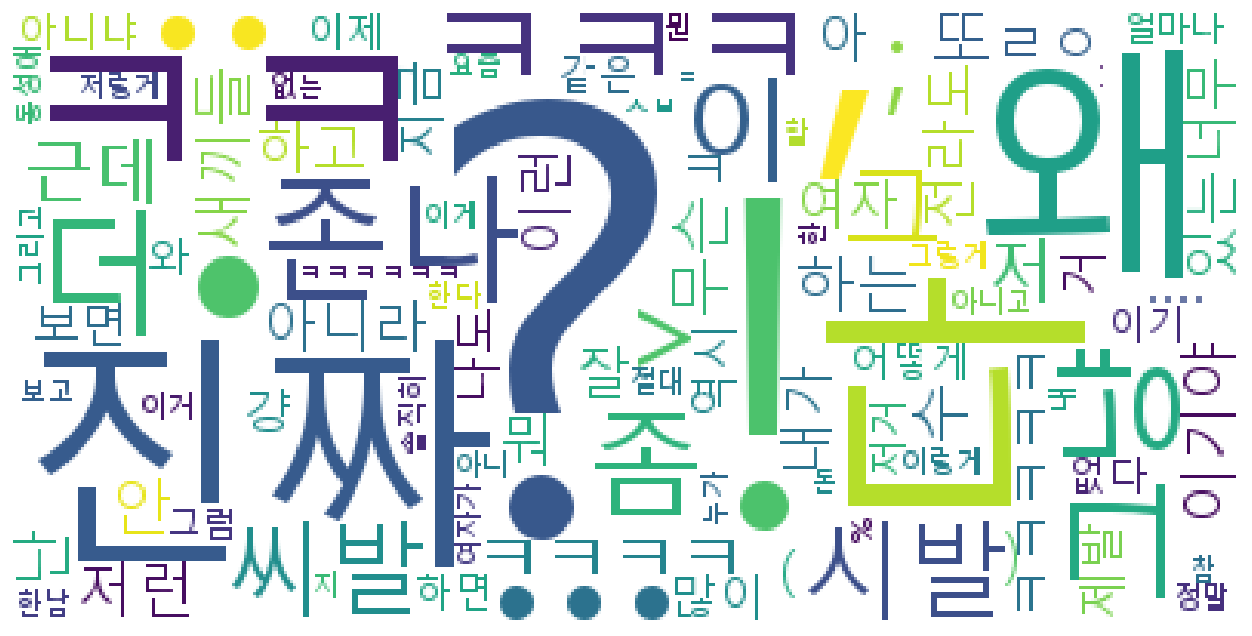

In [29]:
plt.figure(figsize=(20,8)) # 가로,세로 비율지정(인치 단위)
plt.imshow(wc_rs) # 그림을 시각화할때 사용하는 함수
plt.axis('off') # x,y 눈금 숨기기
plt.savefig("./한국어 혐오 단어 100.png") # 이미지 파일로 저장
plt.show() # 시각화 결과 보여주기

#### clean을 제외한 9가지 혐오표현중에서 한 가지를 골라 워드클라우드를 그려보자.

In [31]:
# 불리언 색인 방법
지역_혐오_text = train[ train['연령']==1 ]['문장']

In [32]:
# 쪼개진 단어들이 들어갈 리스트
words = []
for text in tqdm(지역_혐오_text) :
    temp = word_tokenize(text) # 한 문장씩 토큰화
    words = words+temp

100%|█████████████████████████████████████████████████████████████████████████████| 603/603 [00:00<00:00, 10418.81it/s]


In [33]:
len(words)

5833

In [34]:
counter = Counter(words) # 같은 단어의 갯수를 세준다
words_most_30 = counter.most_common(30)

In [35]:
# 단어빈도가 측정된 데이터로부터 워드클라우드 생성
# 입력데이터는 딕셔너리 형태로 집어 넣을 것 (key:단어, value:빈도)
wc_rs = wc.generate_from_frequencies(dict(words_most_30))

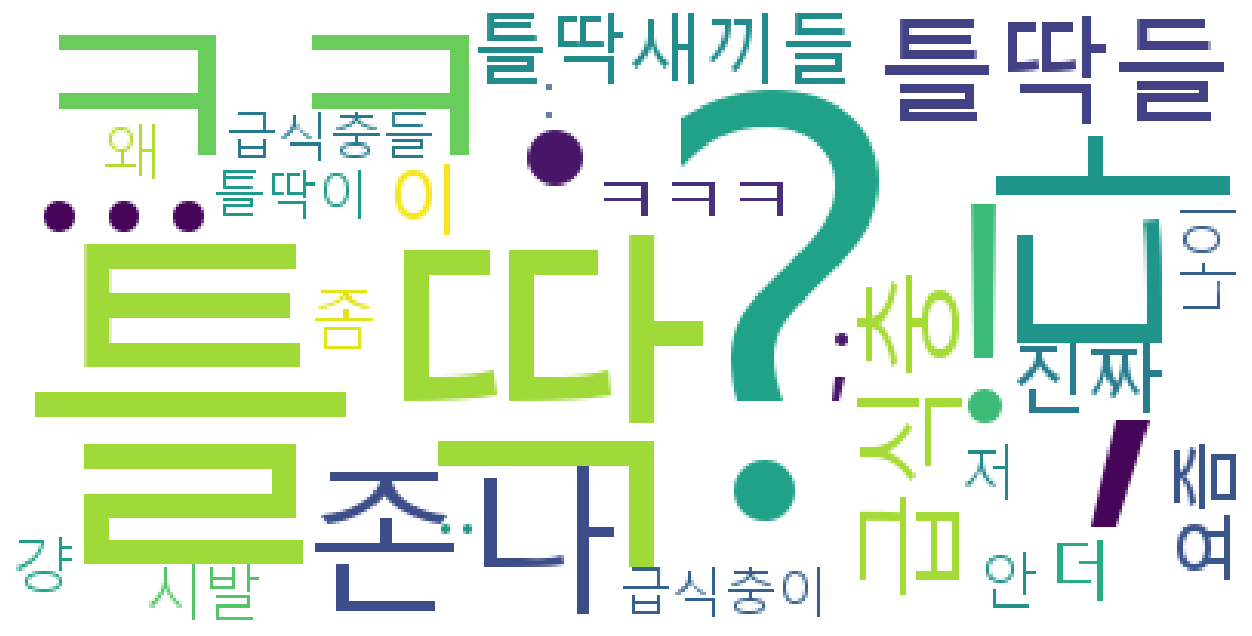

In [36]:
plt.figure(figsize=(20,8)) # 가로,세로 비율지정(인치 단위)
plt.imshow(wc_rs) # 그림을 시각화할때 사용하는 함수
plt.axis('off') # x,y 눈금 숨기기
plt.show() # 시각화 결과 보여주기

#### 전처리 : 텍스트데이터 클렌징
- 문장부호 제거
- 특정 글자가 반복적으로 나타나는 단어토큰 제거 (ex : ㅋㅋ,ㅋㅋㅋ,ㅋㅋㅋㅋ)
- 1글자 단어토큰 제거 : 보통 1글자 단어는 의미를 가지기 어렵다

##### 정규표현식(Regular Expression)
- 특정한 패턴(규칙)을 가진 문자열의 집합을 표현하는 언어
- 핸드폰번호, 이메일처럼 패턴이 있는 문자열의 검색과 치환을 위해 대부분의 프로그래밍 언어에서 지원하고 있다.
- https://wikidocs.net/21703

In [39]:
import re # 정규표현식을 사용할 수 있는 모듈 로딩

In [40]:
# 핸드폰번호 검출예시
# 1. 패턴생성
p = re.compile("010-?[0-9]{4}-?\\d{4}")
# 2. 검출
p.search("안녕하세요 저희 가게는 여기로 연락주세요. 핸드폰 번호는 010-1234-6789입니다.")

<re.Match object; span=(32, 45), match='010-1234-6789'>

In [41]:
p.search("전화번호 : 0101234-5678")

<re.Match object; span=(7, 19), match='0101234-5678'>

In [42]:
# 클렌징할 패턴생성
unsmile_p = re.compile('[!?,.:;0-9a-zA-Zㅋㅎㄷㅇ~]+')

In [43]:
clean_words = [] # 클렌징된 단어토큰이 들어갈 리스트
for w in words :
    if unsmile_p.search(w) : # 단어토큰이 패턴에 매칭된다면
        continue # 다음 단어 반복으로 넘어감
    if len(w) < 2 : # 한글자 단어라면
        continue # 다음 단어 반복으로 넘어감
    clean_words.append(w) # 패턴에 매칭되지 않는다면 리스트에 추가

In [44]:
len(words)

5833

In [45]:
counter = Counter(clean_words) # 같은 단어의 갯수를 세준다
words_most_30 = counter.most_common(30)

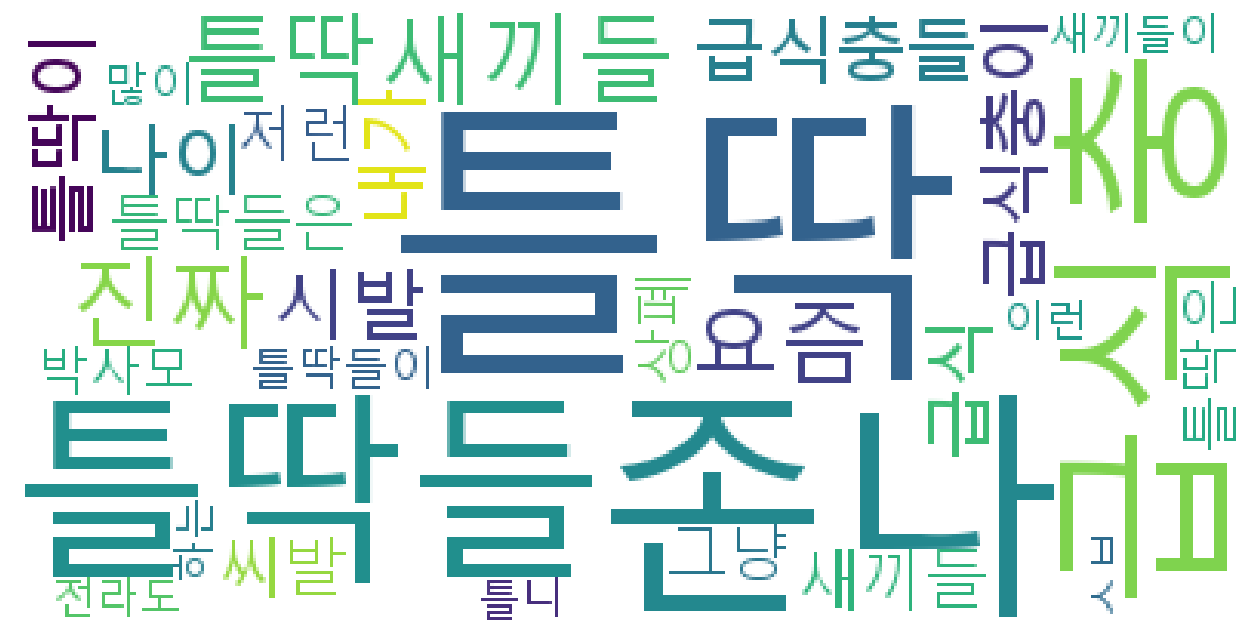

In [46]:
wc_rs = wc.generate_from_frequencies(dict(words_most_30))
plt.figure(figsize=(20,8)) # 가로,세로 비율지정(인치 단위)
plt.imshow(wc_rs) # 그림을 시각화할때 사용하는 함수
plt.axis('off') # x,y 눈금 숨기기
plt.show() # 시각화 결과 보여주기

#### 불용어처리(stop word)
- 데이터셋 내에서 불필요한 단어토큰을 제거하는 작업

In [48]:
stop_words = ["내가", "이런", "그냥", "하는", "저런"]
# 1. 원문에서 제거
stop_clean_words = [] # 불용어가 제거된 리스트
for w in clean_words :
    if w not in stop_words : # 단어토큰이 불용어 목록에 포함되지 않는 경우
        stop_clean_words.append(w)

In [49]:
# 2. 카운팅된 결과에서 제거
words_most_30_dict = dict(words_most_30)
for sw in stop_words :
    del words_most_30_dict[sw]
words_most_30_dict

{'틀딱': 47,
 '존나': 28,
 '틀딱들': 25,
 '급식충': 23,
 '틀딱새끼들': 19,
 '진짜': 19,
 '요즘': 16,
 '시발': 12,
 '나이': 12,
 '급식충들': 10,
 '급식충이': 10,
 '틀딱이': 10,
 '급식': 10,
 '새끼들': 10,
 '씨발': 10,
 '틀딱들은': 9,
 '틀딱은': 8,
 '상폐': 8,
 '박사모': 8,
 '틀딱들이': 8,
 'ㅅㅂ': 8,
 '많이': 8,
 '전라도': 7,
 '틀니': 7,
 '새끼들이': 7}

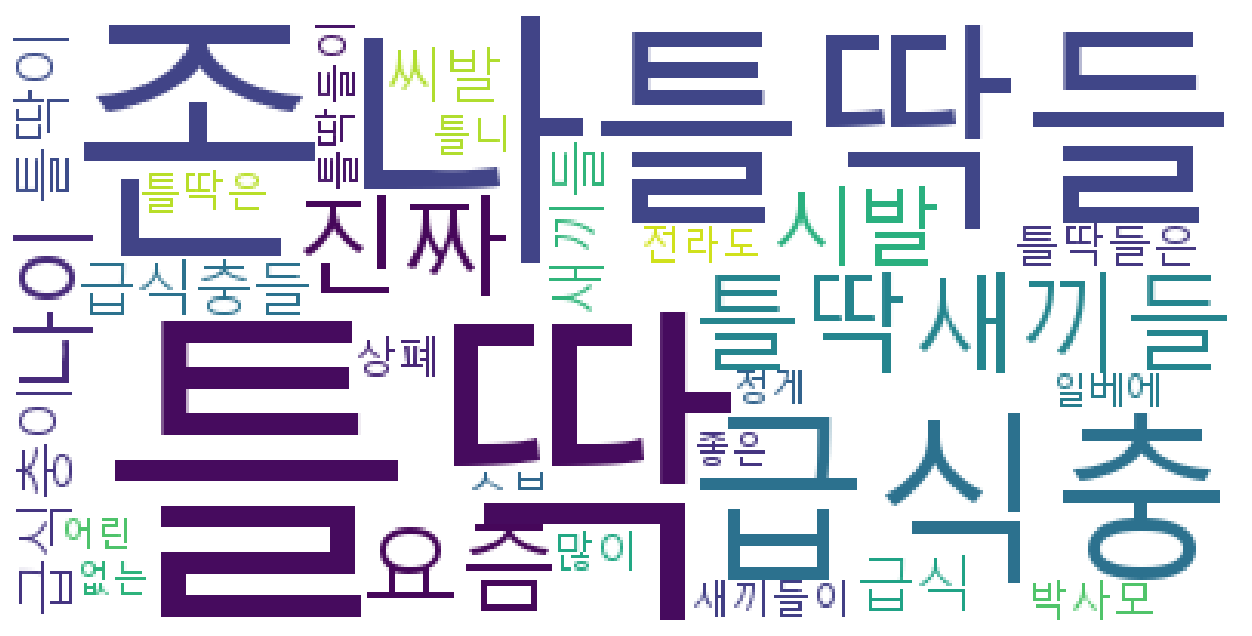

In [50]:
# 불용어 처리된 단어토큰 빈도세기
counter = Counter(stop_clean_words)
words_most_30 = counter.most_common(30)
# 워드클라우드 그리기
wc_rs = wc.generate_from_frequencies(dict(words_most_30))
plt.figure(figsize=(20,8)) # 가로,세로 비율지정(인치 단위)
plt.imshow(wc_rs) # 그림을 시각화할때 사용하는 함수
plt.axis('off') # x,y 눈금 숨기기
plt.show() # 시각화 결과 보여주기

#### Kiwi 활용하기
- https://github.com/bab2min/kiwipiepy
- 형태소 분석, 불용어 처리, 기타 다양한 기능을 지원

In [52]:
# kiwi 설치하기
# !pip install kiwipiepy

#### 띄어쓰기 교정

In [54]:
from kiwipiepy import Kiwi
kiwi = Kiwi() # 객체생성

In [55]:
# 띄어쓰기 교정
kiwi.space("띄어쓰기없이작성된텍스트네이걸교정 해")

'띄어쓰기 없이 작성된 텍스트네 이걸 교정해'

#### Kiwi를 이용한 불용어 처리

In [57]:
from kiwipiepy.utils import Stopwords
stopwords = Stopwords() # 불용어 객체생성 -> 기본적인 한국어 불용어가 탑재

In [58]:
kiwi.tokenize("분석 결과에서 불용어만 제외하고 출력할 수도 있다.", stopwords=stopwords)

[Token(form='분석', tag='NNG', start=0, len=2),
 Token(form='결과', tag='NNG', start=3, len=2),
 Token(form='불', tag='NNG', start=8, len=1),
 Token(form='용어', tag='NNG', start=9, len=2),
 Token(form='제외', tag='NNG', start=13, len=2),
 Token(form='출력', tag='NNG', start=18, len=2),
 Token(form='있', tag='VA', start=25, len=1)]

In [59]:
# 불용어 추가
stopwords.add(("결과","NNG")) # 새로운 불용어 등록

In [60]:
kiwi.tokenize("분석 결과에서 불용어만 제외하고 출력할 수도 있다.", stopwords=stopwords)

[Token(form='분석', tag='NNG', start=0, len=2),
 Token(form='불', tag='NNG', start=8, len=1),
 Token(form='용어', tag='NNG', start=9, len=2),
 Token(form='제외', tag='NNG', start=13, len=2),
 Token(form='출력', tag='NNG', start=18, len=2),
 Token(form='있', tag='VA', start=25, len=1)]

#### 이모지 제거

In [62]:
# 이모지 패키지 설치
# !pip install emoji

In [63]:
import emoji

In [64]:
emoji.replace_emoji("오늘 점심으로 짜장밥을 먹었는데 너무 맛있었어.😊😊😊")

'오늘 점심으로 짜장밥을 먹었는데 너무 맛있었어.'

In [65]:
emoji.demojize("오늘 점심으로 짜장밥을 먹었는데 너무 맛있었어.😊😊😊")

'오늘 점심으로 짜장밥을 먹었는데 너무 맛있었어.:smiling_face_with_smiling_eyes::smiling_face_with_smiling_eyes::smiling_face_with_smiling_eyes:'

#### 형태소 분석
- 의미를 가지는 가장작은 크기의 문장단위를 형태소라고 한다.
- 형태소 단위로 분리하고 품사를 부착하는 작업을 품사태깅이라고 한다.

In [67]:
morphs_list = [] # 형태소로 분리된 단어토큰이 들어갈 리스트
for w in tqdm(clean_words) :
    morphs_rs = kiwi.tokenize(w, stopwords=stopwords) # 형태소 분리 및 불용어 처리
    morphs_list = morphs_list + morphs_rs

100%|████████████████████████████████████████████████████████████████████████████| 4648/4648 [00:00<00:00, 8220.41it/s]


In [68]:
len(morphs_list)

7592

In [69]:
morphs_list[:3]

[Token(form='카스', tag='NNG', start=1, len=2),
 Token(form='머', tag='NP', start=0, len=1),
 Token(form='ᆷ', tag='EF', start=1, len=1)]

##### 특정 품사 필터링하기
- https://github.com/bab2min/Kiwi?tab=readme-ov-file#%ED%92%88%EC%82%AC-%ED%83%9C%EA%B7%B8

In [71]:
# 일반명사(NNG), 동사(VV), 형용사(VA)를 필터링 해보자
morphs_filtering_list = []
for m in morphs_list :
    if m.tag in ["NNG","VV","VA"] :
        morphs_filtering_list.append(m.form)

In [72]:
len(morphs_filtering_list)

4411

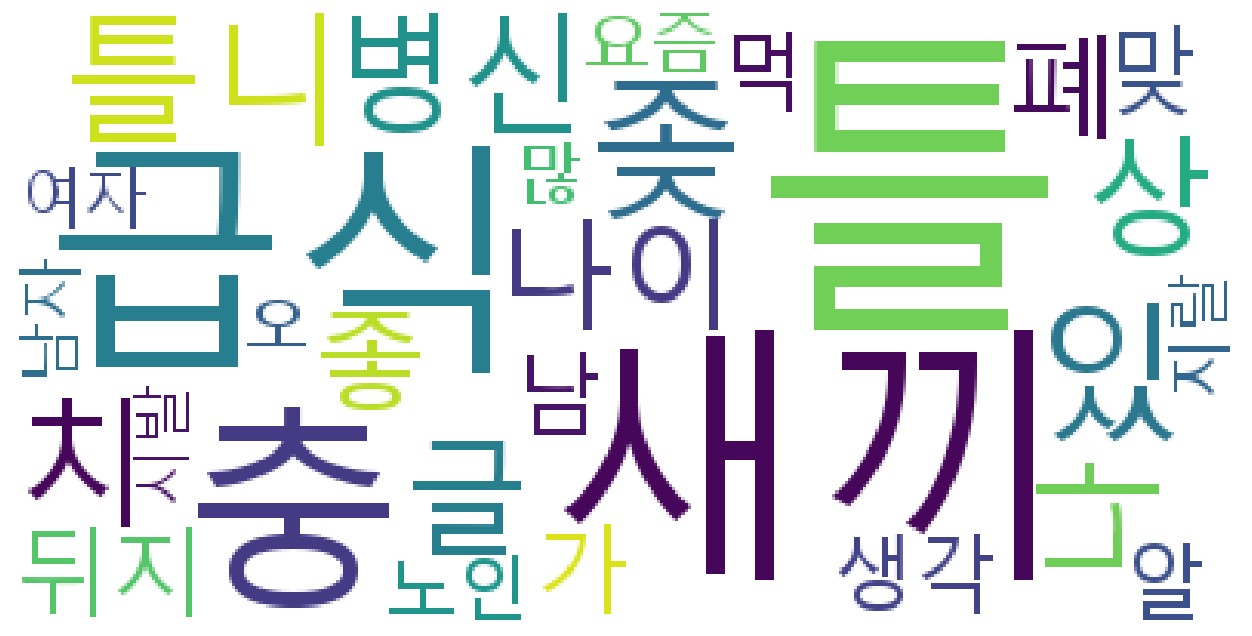

In [73]:
# 불용어 처리된 단어토큰 빈도세기
counter = Counter(morphs_filtering_list)
words_most_30 = counter.most_common(30)
# 워드클라우드 그리기
wc_rs = wc.generate_from_frequencies(dict(words_most_30))
plt.figure(figsize=(20,8)) # 가로,세로 비율지정(인치 단위)
plt.imshow(wc_rs) # 그림을 시각화할때 사용하는 함수
plt.axis('off') # x,y 눈금 숨기기
plt.show() # 시각화 결과 보여주기

### 워드클라우드 실습
- https://github.com/bab2min/corpus/tree/master/sentiment
- 네이버 쇼핑 리뷰 데이터셋
- 긍정/부정 라벨링이 되어있는 데이터셋
- 분석방법 선택
  - 1.전체데이터 워드클라우드 실시
  - 2.긍정 또는 부정 리뷰만 골라서 워드클라우드 실시
  - 3.특정 주제,키워드가 포함된 리뷰만 모아서 워드클라우드 실시(ex : 배송)

In [89]:
naver_review = pd.read_csv("./data/naver_shopping.txt", sep='\t', names=["평점","리뷰"])
naver_review

,평점,리뷰
0,5,배공빠르고 굿
1,2,택배가 엉망이네용 저희집 밑에층에 말도없이 놔두고가고
2,5,아주좋아요 바지 정말 좋아서2개 더 구매했어요 이가격에 대박입니다. 바느질이 조금 ...
3,2,선물용으로 빨리 받아서 전달했어야 하는 상품이었는데 머그컵만 와서 당황했습니다. 전...
4,5,민트색상 예뻐요. 옆 손잡이는 거는 용도로도 사용되네요 ㅎㅎ
...,...,...
199995,2,장마라그런가!!! 달지않아요
199996,5,다이슨 케이스 구매했어요 다이슨 슈퍼소닉 드라이기 케이스 구매했어요가격 괜찮고 배송...
199997,5,로드샾에서 사는것보다 세배 저렴하네요 ㅜㅜ 자주이용할께요
199998,5,넘이쁘고 쎄련되보이네요~


In [101]:
review_Top100_text = naver_review.iloc[:100]['리뷰'] # 1. 전체데이터 워드클라우드용 데이터 (너무 커서 줄임)

In [107]:
# 쪼개진 단어들이 들어갈 리스트
words = []
for text in tqdm(review_Top100_text) :
    temp = word_tokenize(text) # 한 문장씩 토큰화
    words = words+temp

counter = Counter(words) # 같은 단어의 갯수를 세준다
most_words_100_all = counter.most_common(100) # 가장 많이 나온 단어 탑100

100%|█████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 11141.73it/s]


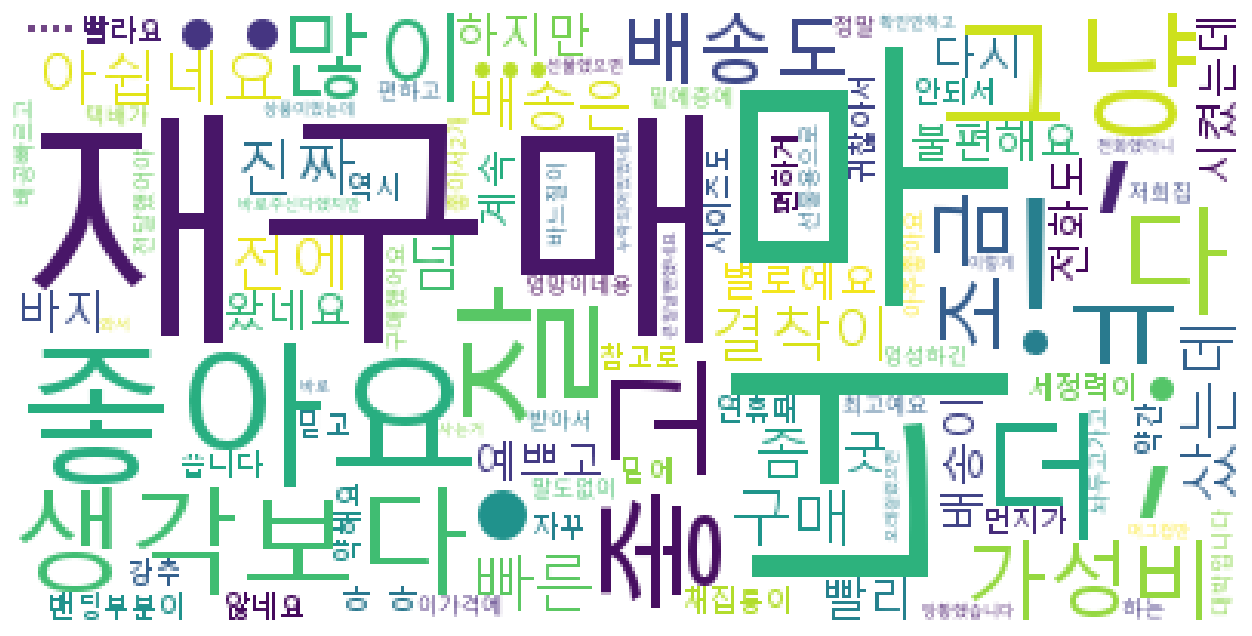

In [109]:
wc_rs = wc.generate_from_frequencies(dict(most_words_100_all))

# 시각화
import matplotlib.pyplot as plt
plt.rc('font',family="Malgun Gothic")

plt.figure(figsize=(20,8)) # 가로,세로 비율지정(인치 단위)
plt.imshow(wc_rs) # 그림을 시각화할때 사용하는 함수
plt.axis('off') # x,y 눈금 숨기기
plt.show() # 시각화 결과 보여주기

In [119]:
review_neg_text =naver_review[naver_review['평점'] < 4]['리뷰'].iloc[:100] # 2. 부정 워드클라우드용 데이터

In [115]:
# 쪼개진 단어들이 들어갈 리스트
words = []
for text in tqdm(review_neg_text) :
    temp = word_tokenize(text) # 한 문장씩 토큰화
    words = words+temp

counter = Counter(words) # 같은 단어의 갯수를 세준다
most_words_100_all = counter.most_common(100) # 가장 많이 나온 단어 탑100

100%|█████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 11117.51it/s]


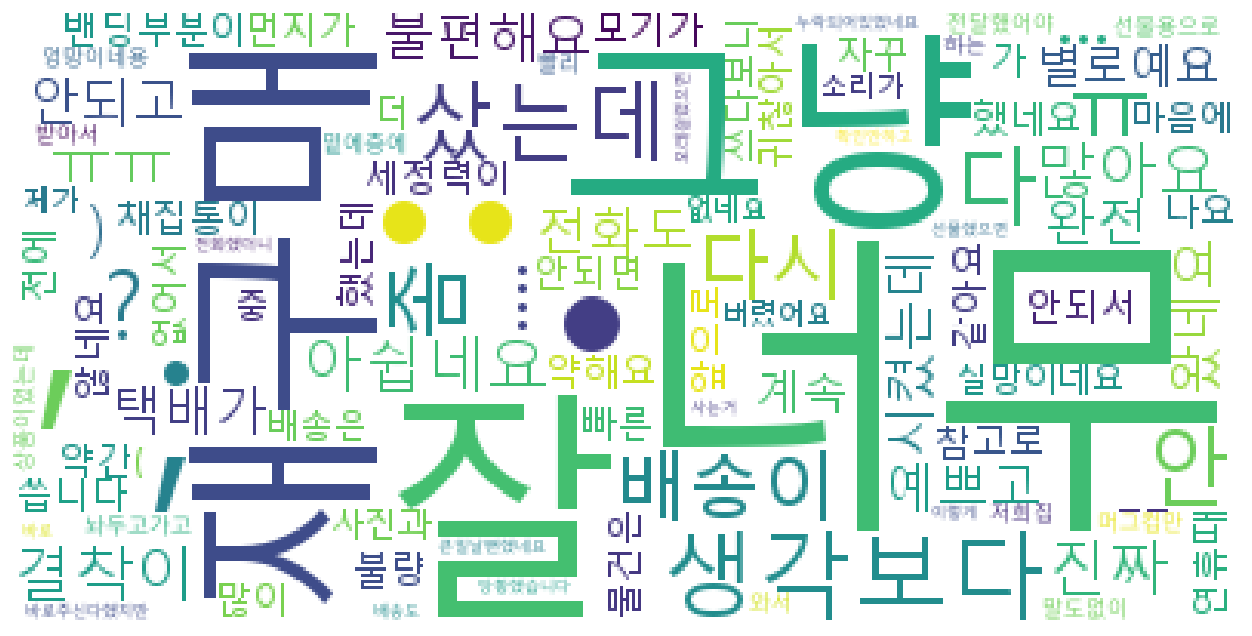

In [117]:
wc_rs = wc.generate_from_frequencies(dict(most_words_100_all))

# 시각화
import matplotlib.pyplot as plt
plt.rc('font',family="Malgun Gothic")

plt.figure(figsize=(20,8)) # 가로,세로 비율지정(인치 단위)
plt.imshow(wc_rs) # 그림을 시각화할때 사용하는 함수
plt.axis('off') # x,y 눈금 숨기기
plt.show() # 시각화 결과 보여주기

In [149]:
delivery_reviews = naver_review[naver_review['리뷰'].str.contains('배송')]['리뷰'].iloc[:100] # 3. 배송 리뷰 워드클라우드를 위한 배송 키워드 포함한 데이터
delivery_reviews

3      선물용으로 빨리 받아서 전달했어야 하는 상품이었는데 머그컵만 와서 당황했습니다. 전...
6      주문을 11월6에 시켰는데 11월16일에 배송이 왔네요 ㅎㅎㅎ 여기 회사측과는 전화...
24                  재구매 늘 사는 흙이에요 팽이들이 젤 좋아해요 빠른배송 감사합니다
26     배송기사나, 판매하는 회사나 불친절하고 불쾌합니다. 서비스면에선 최악이네요 제품은 ...
41     진짜 너무하시네요 배송이늦는건 엄절수없다하고 참앗지만 밑에 서랍이 금방 안되서 AS...
                             ...                        
713                                           배송이 별로임;;;
756              배송 완전 빠름! 하루만에 왔어요 다른 곳보다 저렴하게 잘 산것 같아요
760    배송과 제품 문제로 별두개 감점 일단 제품 상태가 심각합니다 박스는 여기저기 터지고...
767                        빠른배송 좋쿠요 제품은 아직 사용해보지 못했습니다..
771                                     배송은 꽤 늦었지만 잘먹을게요
Name: 리뷰, Length: 100, dtype: object

In [153]:
# 쪼개진 단어들이 들어갈 리스트
words = []
for text in delivery_reviews :
    temp = word_tokenize(text) # 한 문장씩 토큰화
    words = words+temp

counter = Counter(words) # 같은 단어의 갯수를 세준다
most_words_100_all = counter.most_common(100) # 가장 많이 나온 단어 

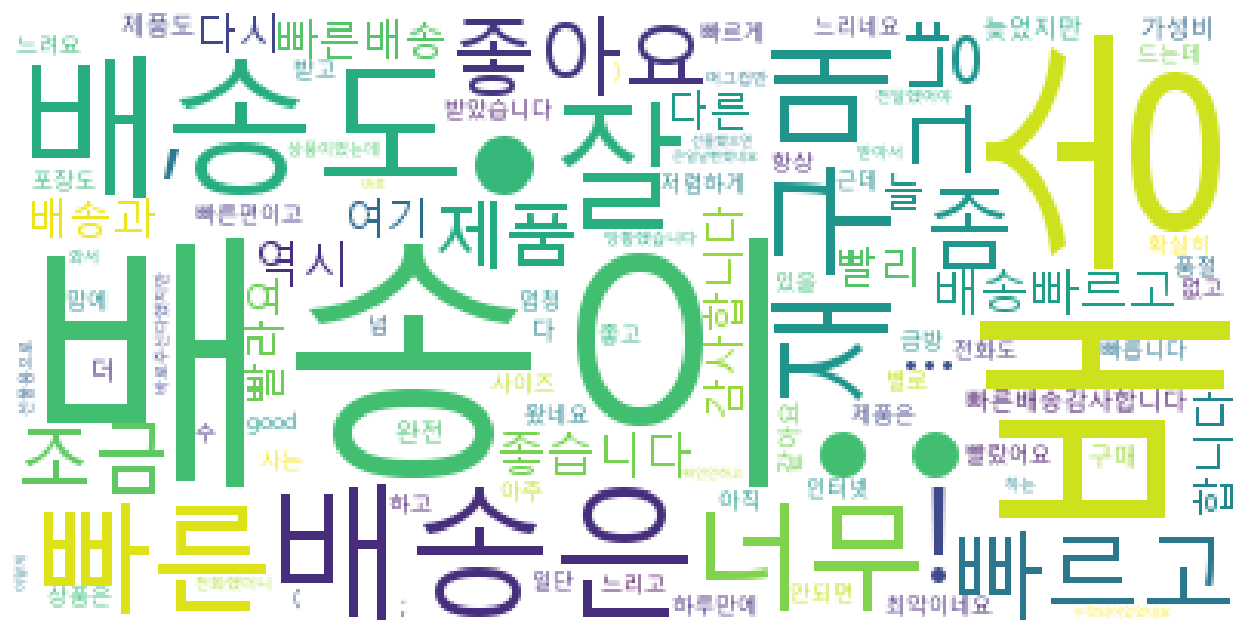

In [155]:
wc_rs = wc.generate_from_frequencies(dict(most_words_100_all))

# 시각화
import matplotlib.pyplot as plt
plt.rc('font',family="Malgun Gothic")

plt.figure(figsize=(20,8)) # 가로,세로 비율지정(인치 단위)
plt.imshow(wc_rs) # 그림을 시각화할때 사용하는 함수
plt.axis('off') # x,y 눈금 숨기기
plt.show() # 시각화 결과 보여주기